<a href="https://colab.research.google.com/github/chanc3-m/project-2/blob/main/project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Math 5750/6880: Mathematics of Data Science \
Project 2

# 1. Clustering Gaussian Blobs using $k$-means

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


# Generate 5 Gaussian blobs in 10 dimensions
X, y_true = make_blobs(
    n_samples=1000,
    centers=5,
    n_features=10,
    cluster_std=1.5,
    random_state=1)        # reproducibility
X = StandardScaler().fit_transform(X)

print(type(X),X.shape)
print(type(y_true),y_true.shape)

<class 'numpy.ndarray'> (1000, 10)
<class 'numpy.ndarray'> (1000,)


Smallest k-means inertia: 924.3159961688092


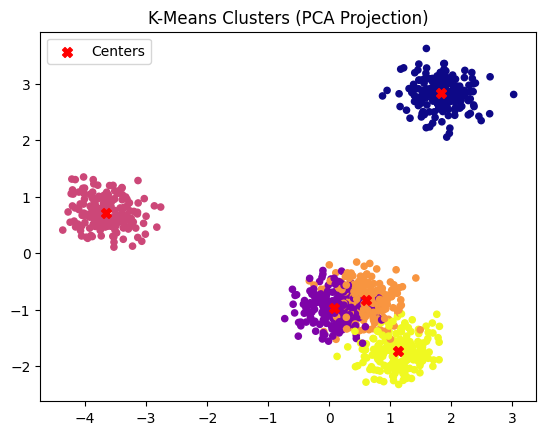

2
1
3
0
4


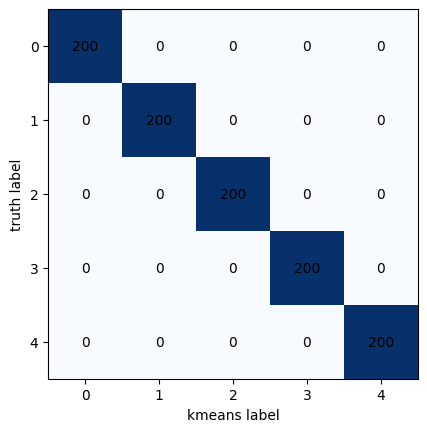

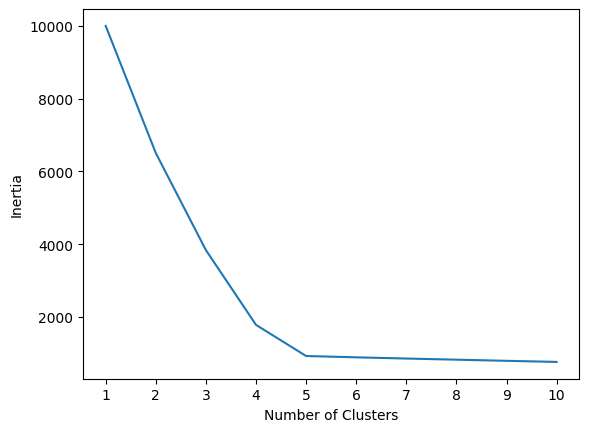

In [ ]:

# Do the k-means cluster analysis on the data for k=5
kmeans = KMeans(n_clusters = 5, random_state = 1, n_init = 10)
y_pred = kmeans.fit_predict(X)

print("Smallest k-means inertia:", kmeans.inertia_)

# Do PCA dimensionality reduction to make the data 2D and easier to visualize
pca = PCA(n_components = 2)
x_pca = pca.fit_transform(X)
centers_pca = pca.transform(kmeans.cluster_centers_)

# Plot the clusters and their centers, different clusters are different colors
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_pred, cmap='plasma', s=20)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=50, label='Centers')
plt.title("K-Means Clusters (PCA Projection)")
plt.legend()
plt.show()

k_labels = kmeans.labels_  # The cluster each point is assigned to
k_labels_matched = np.empty_like(k_labels)

# For each cluster
for k in np.unique(k_labels):
  # Go through each point and see if the cluster it was assigned matches
  # with its true cluster, if it does, it is counted as being assigned correctly
  match_nums = [np.sum((k_labels==k)*(y_true==t)) for t in np.unique(y_true)]
  # Points in cluster k are assigned to the true label that most of them were
  # assigned to
  k_labels_matched[k_labels == k] = np.unique(y_true)[np.argmax(match_nums)]

cm = confusion_matrix(y_true, k_labels_matched)

# Create confusion matrix
plt.imshow(cm, interpolation='none', cmap='Blues')
for (i, j), z in np.ndenumerate(cm):
    plt.text(j, i, z, ha='center', va='center')
plt.xlabel("kmeans label")
plt.ylabel("truth label")
plt.show()

# Get the different inertia values for elbow analysis
inertias = []
for k in range(1, 11):
  km = KMeans(n_clusters=k, random_state=1, n_init=10)
  km.fit(X)
  inertias.append(km.inertia_)

# Create a plot for elbow analysis
plt.plot(range(1, 11), inertias)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()



# 2. Clustering Fashion-MNIST using $k$-means

> Add blockquote



In [9]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

print(type(X),X.shape)
print(type(y),y.shape)

<class 'numpy.ndarray'> (70000, 784)
<class 'numpy.ndarray'> (70000,)


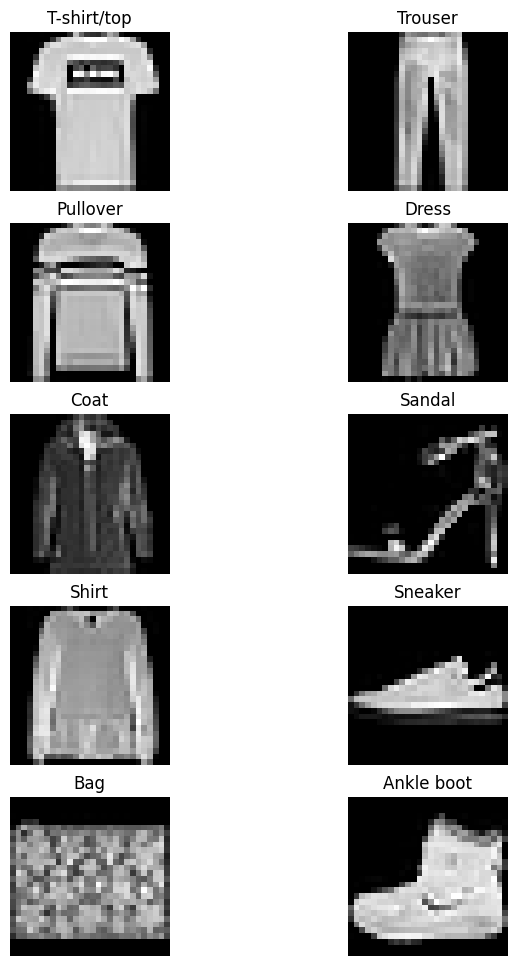

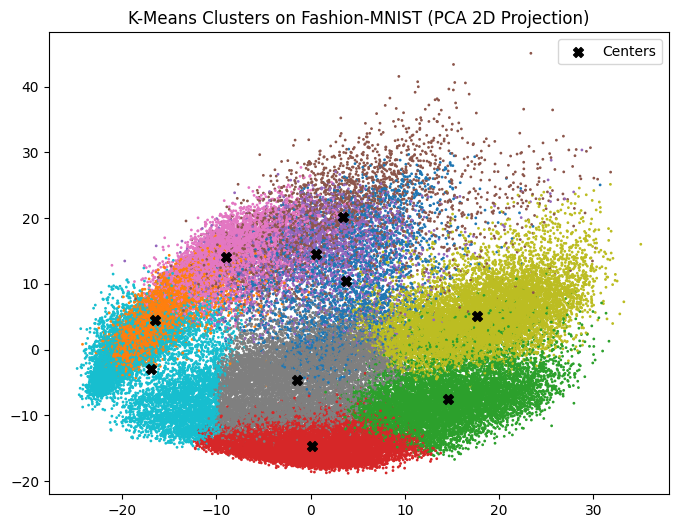

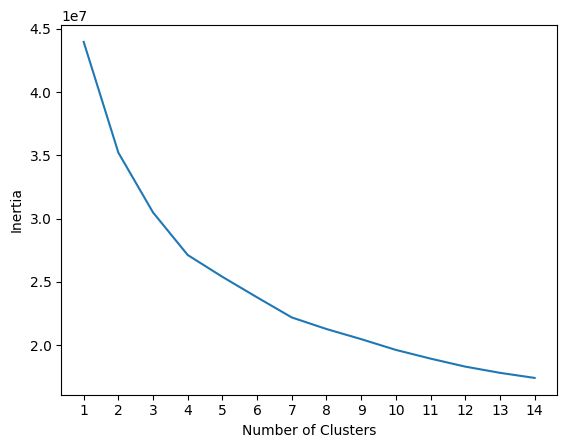

In [10]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

label_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Reshape to 28x28 pixel images for plotting
X_images = X.reshape(-1, 28, 28)

# Get the first image in each group to plot
example = [X_images[np.where(y == label)[0][0]] for label in range(10)]

plt.figure(figsize=(8, 12))
for i, img in enumerate(example):
    plt.subplot(5, 2, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(label_names[i])
    plt.axis('off')
plt.show()

# Scale and reduce the dimensions for ease
X = StandardScaler().fit_transform(X)
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

# Perform k-means cluster analysis on the reduced dimension data
kmeans = KMeans(n_clusters = 10, n_init = 10)
y_pred = kmeans.fit_predict(X_pca)
k_labels = kmeans.fit_predict(X_pca)

# Reduce to 2 dimensions for plotting
pca2 = PCA(n_components = 2)
X_pca2 = pca2.fit_transform(X_pca)

plt.figure(figsize=(8,6))
plt.scatter(X_pca2[:, 0], X_pca2[:, 1], c=y_pred, cmap="tab10", s=1)
plt.scatter(pca2.transform(kmeans.cluster_centers_)[:, 0],
            pca2.transform(kmeans.cluster_centers_)[:, 1],
            c="black", marker="X", s=50, label="Centers")
plt.title("K-Means Clusters on Fashion-MNIST (PCA 2D Projection)")
plt.legend()
plt.show()

# Note that this analysis doesn't actually seem necessary because we actually know exactly how many custers there should be
# Get the different inertia values for elbow analysis
inertias = []
for k in range(1, 15):
  km = KMeans(n_clusters=k, random_state=1, n_init=10)
  km.fit(X_pca)
  inertias.append(km.inertia_)

# Create a plot for elbow analysis
plt.plot(range(1, 15), inertias)
plt.xticks(range(1, 15))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()


# 3. Dimensionality reduction for Fashion-MNIST

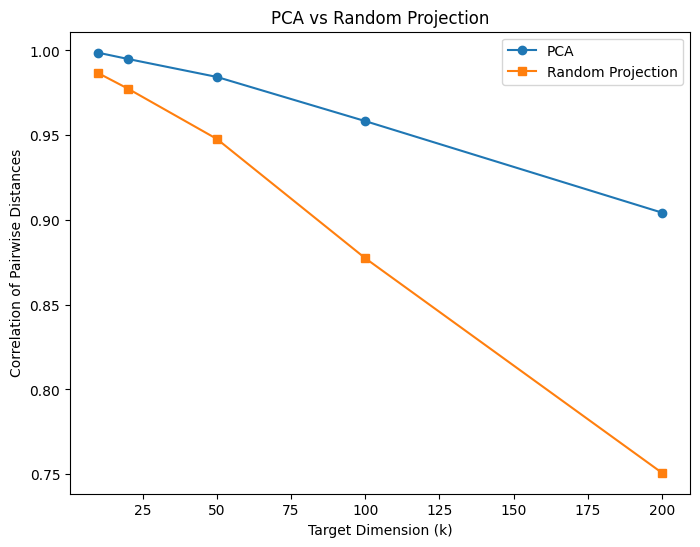

In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.random_projection import GaussianRandomProjection
from sklearn.metrics import pairwise_distances

# Load Fashion-MNIST from OpenML
# Classes (0-9): T-shirt/top, Trouser, Pullover, Dress, Coat, Sandal, Shirt, Sneaker, Bag, Ankle boot
X, y = fetch_openml("Fashion-MNIST", version=1, as_frame=False, parser="auto", return_X_y=True)
y = y.astype(int)

# Reduce sample size for speed
X = X[:5000]
X = StandardScaler().fit_transform(X)

original_pairwise = pairwise_distances(X)

pca_correlations = []
rp_correlations = []

# PCA
pca200 = PCA(n_components=200)
X_pca200 = pca200.fit_transform(X)
pca200_pairwise = pairwise_distances(X_pca200)
pca_correlations.append(np.corrcoef(original_pairwise.ravel(), pca200_pairwise.ravel())[0, 1])

pca100 = PCA(n_components=100)
X_pca100 = pca100.fit_transform(X)
pca100_pairwise = pairwise_distances(X_pca100)
pca_correlations.append(np.corrcoef(original_pairwise.ravel(), pca100_pairwise.ravel())[0, 1])

pca50 = PCA(n_components=50)
X_pca50 = pca50.fit_transform(X)
pca50_pairwise = pairwise_distances(X_pca50)
pca_correlations.append(np.corrcoef(original_pairwise.ravel(), pca50_pairwise.ravel())[0, 1])

pca20 = PCA(n_components=20)
X_pca20 = pca20.fit_transform(X)
pca20_pairwise = pairwise_distances(X_pca20)
pca_correlations.append(np.corrcoef(original_pairwise.ravel(), pca20_pairwise.ravel())[0, 1])

pca10 = PCA(n_components=10)
X_pca10 = pca10.fit_transform(X)
pca10_pairwise = pairwise_distances(X_pca10)
pca_correlations.append(np.corrcoef(original_pairwise.ravel(), pca10_pairwise.ravel())[0, 1])

# Random Projection
rp200 = GaussianRandomProjection(n_components = 200)
X_rp200 = rp200.fit_transform(X)
rp200_pairwise = pairwise_distances(X_rp200)
rp_correlations.append(np.corrcoef(original_pairwise.ravel(), rp200_pairwise.ravel())[0, 1])

rp100 = GaussianRandomProjection(n_components = 100)
X_rp100 = rp100.fit_transform(X)
rp100_pairwise = pairwise_distances(X_rp100)
rp_correlations.append(np.corrcoef(original_pairwise.ravel(), rp100_pairwise.ravel())[0, 1])

rp50 = GaussianRandomProjection(n_components = 50)
X_rp50 = rp50.fit_transform(X)
rp50_pairwise = pairwise_distances(X_rp50)
rp_correlations.append(np.corrcoef(original_pairwise.ravel(), rp50_pairwise.ravel())[0, 1])

rp20 = GaussianRandomProjection(n_components = 20)
X_rp20 = rp20.fit_transform(X)
rp20_pairwise = pairwise_distances(X_rp20)
rp_correlations.append(np.corrcoef(original_pairwise.ravel(), rp20_pairwise.ravel())[0, 1])

rp10 = GaussianRandomProjection(n_components = 10)
X_rp10 = rp10.fit_transform(X)
rp10_pairwise = pairwise_distances(X_rp10)
rp_correlations.append(np.corrcoef(original_pairwise.ravel(), rp10_pairwise.ravel())[0, 1])

dims = [10, 20, 50, 100, 200]
plt.figure(figsize=(8,6))
plt.plot(dims, pca_correlations, marker="o", label="PCA")
plt.plot(dims, rp_correlations, marker="s", label="Random Projection")
plt.xlabel("Target Dimension (k)")
plt.ylabel("Correlation of Pairwise Distances")
plt.title("PCA vs Random Projection")
plt.legend()
plt.show()



# 4. Clustering Fashion-MNIST using spectral clustering

In [ ]:
# your code here